### Importing libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

### Reading Dataframe

In [90]:
df = pd.read_csv("students_adaptability_level_online_education.csv")
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [91]:
df.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

### Checking for Null Values in the Given DataFrame

In [92]:
df.isna().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

### Preprocessing the Dataframe

In [93]:
df['Gender'].unique()

# Boy = 0
# Girl = 1

temp = []
for i in df['Gender']:
    if i == 'Boy':
        temp.append(0)
    elif i == 'Girl':
        temp.append(1)
df['Gender'] = temp

In [94]:
#Replacing Age column values with meaned values 
temp = []
for i in df['Age']:
    temp.append(round((int(i.split('-')[0])+int(i.split('-')[1]))/2))
len(temp)

df['Age'] = temp

In [95]:
# Non Government = 0 
# Government  = 1

temp = []
for i in df['Institution Type']:
    if i == 'Non Government':
        temp.append(0)
    elif i == 'Government':
        temp.append(1)
df['Institution Type'] = temp

In [96]:
# University = 0
# College = 1
# School = 2

temp = []
for i in df['Education Level']:
    if i == 'University':
        temp.append(0)
    elif i == 'College':
        temp.append(1)
    elif i == 'School':
        temp.append(2)
df['Education Level'] = temp


In [97]:
# No = 0
# Yes = 1

temp = []
for i in df['IT Student']:
    if i == 'No':
        temp.append(0)
    elif i == 'Yes':
        temp.append(1)
df['IT Student'] = temp

In [98]:
# No = 0
# Yes = 1

temp = []
for i in df['Location']:
    if i == 'No':
        temp.append(0)
    elif i == 'Yes':
        temp.append(1)
df['Location'] = temp

In [99]:
#For Load shedding
# Low = 0
# High = 1

temp = []
for i in df['Load-shedding']:
    if i == 'Low':
        temp.append(0)
    elif i == 'High':
        temp.append(1)
df['Load-shedding'] = temp

In [100]:
# For the Financial Condition
# Poor = 0
# Mid = 1
# Rich = 2

temp = []
for i in df['Financial Condition']:
    if i == 'Poor':
        temp.append(0)
    elif i == 'Mid':
        temp.append(1)
    elif i == 'Rich':
        temp.append(2)
df['Financial Condition'] = temp


In [101]:
# For Internet type
# WiFi = 0
# Mobile Data = 1

temp = []
for i in df['Internet Type']:
    if i == 'Wifi':
        temp.append(0)
    elif i == 'Mobile Data':
        temp.append(1)
df['Internet Type'] = temp

In [102]:
# Dropping Class Duration as it less relevant
del df['Class Duration']

In [103]:
#Dropping all the columns of 2G data users as it is practically not possible to load classes on 2G

df.drop(list(df[df['Network Type']=='2G'].index),axis = 0,inplace = True)

In [104]:
#For network type
#4g = 0
# 3G = 1

temp = []
for i in df['Network Type']:
    if i == '4G':
        temp.append(0)
    elif i == '3G':
        temp.append(1)
df['Network Type'] = temp

In [105]:
# For self LMS
# No = 0
# Yes = 1

temp = []
for i in df['Self Lms']:
    if i == 'No':
        temp.append(0)
    elif i == 'Yes':
        temp.append(1)
df['Self Lms'] = temp

In [106]:
# For the device column
# Tab = 0
# Mobile = 1
# Computer = 2

temp = []
for i in df['Device']:
    if i == 'Tab':
        temp.append(0)
    elif i == 'Mobile':
        temp.append(1)
    elif i == 'Computer':
        temp.append(2)
df['Device'] = temp

In [107]:
# For adaptivity level
# low = 0
# Moderate = 1
# High = 2

'''temp = []
for i in df['Adaptivity Level']:
    if i == 'Low':
        temp.append(0)
    elif i == 'Moderate':
        temp.append(1)
    elif i == 'High':
        temp.append(2)
df['Adaptivity Level'] = temp'''

df.drop(list(df[df['Adaptivity Level']=='Moderate'].index),axis = 0,inplace = True)

In [109]:
temp = []
for i in df['Adaptivity Level']:
    if i == 'Low':
        temp.append(0)
    elif i == 'High':
        temp.append(1)
df['Adaptivity Level'] = temp

### Plots of relationship between the target column and the rest 

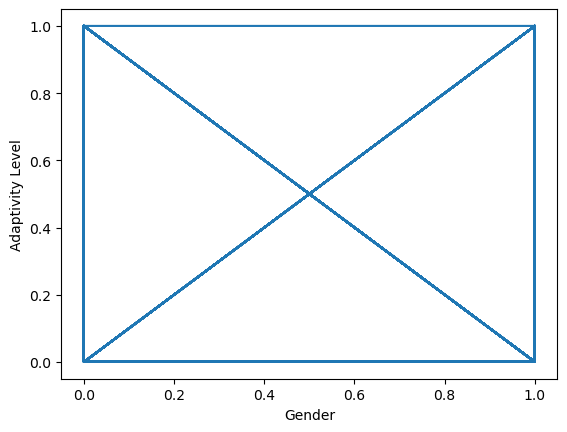

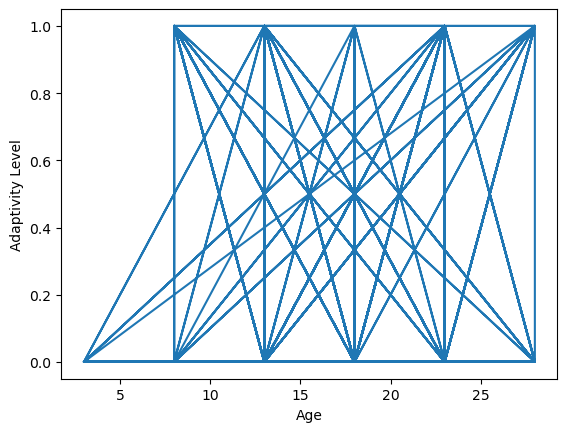

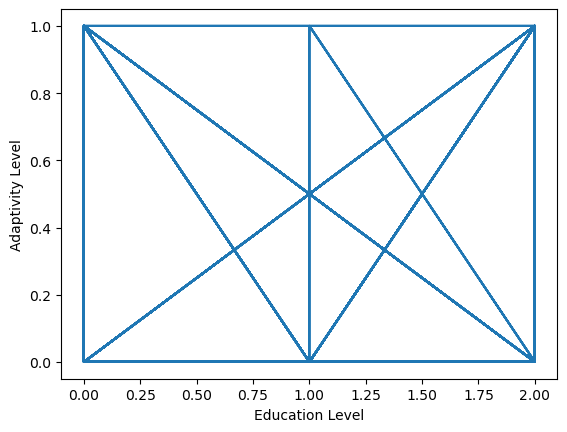

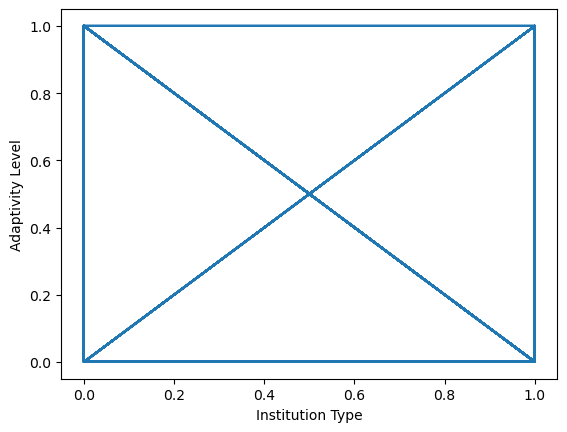

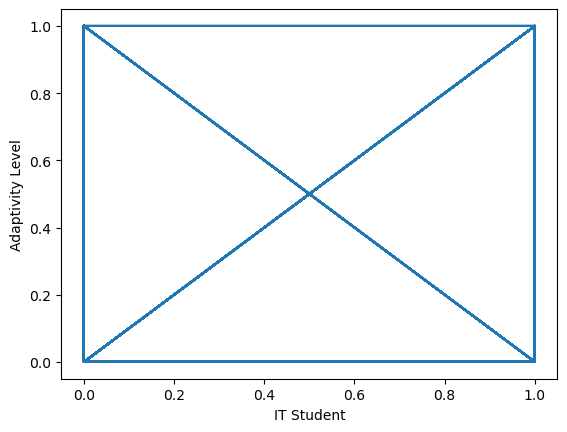

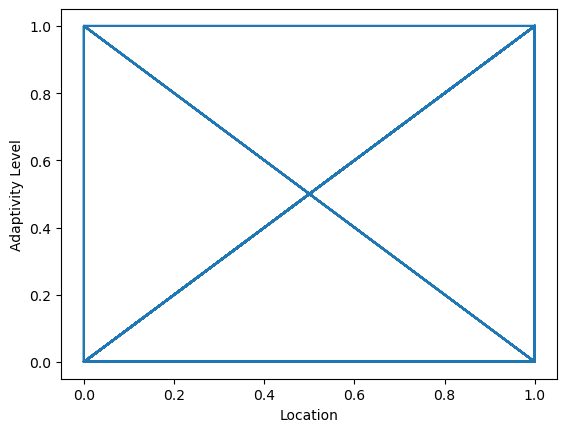

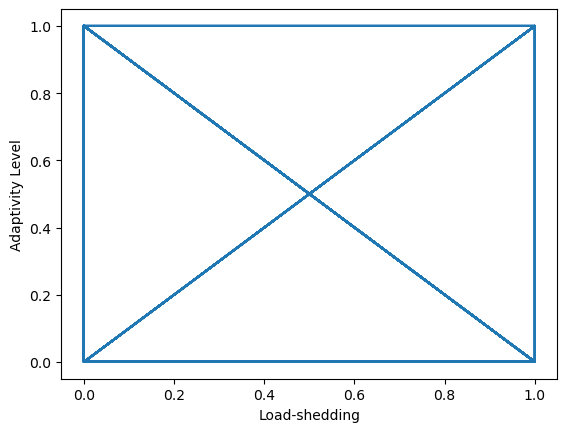

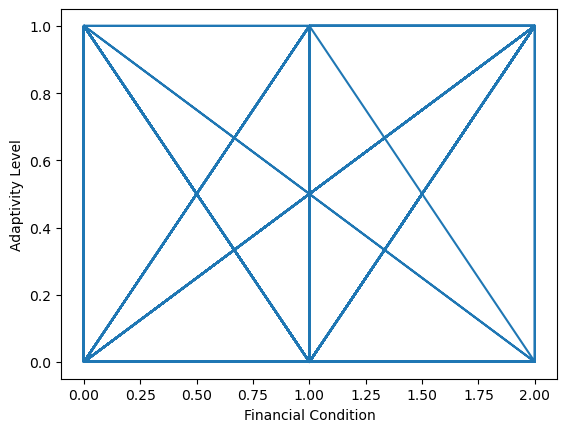

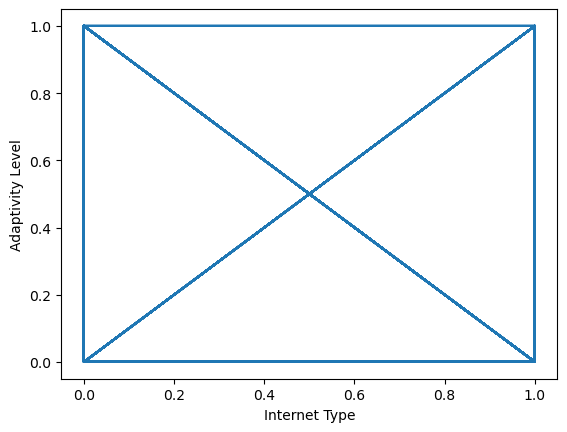

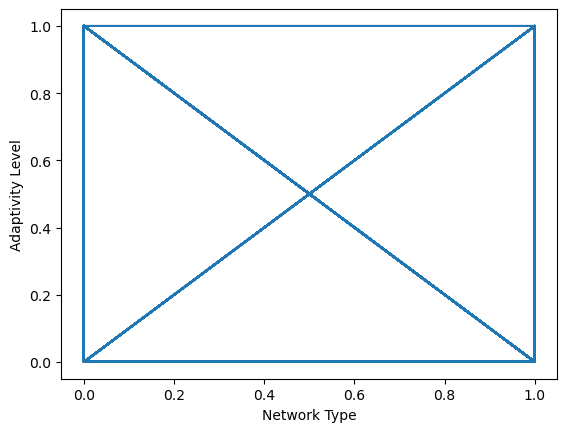

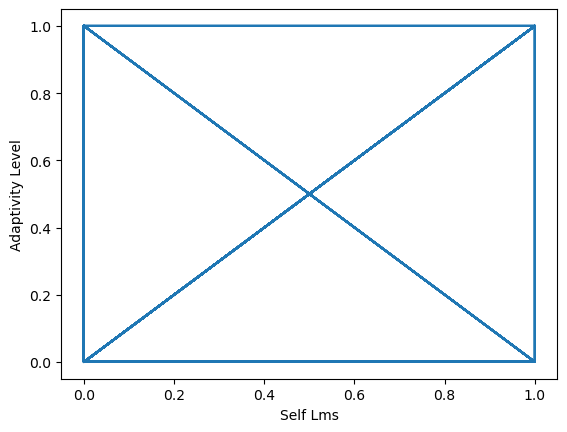

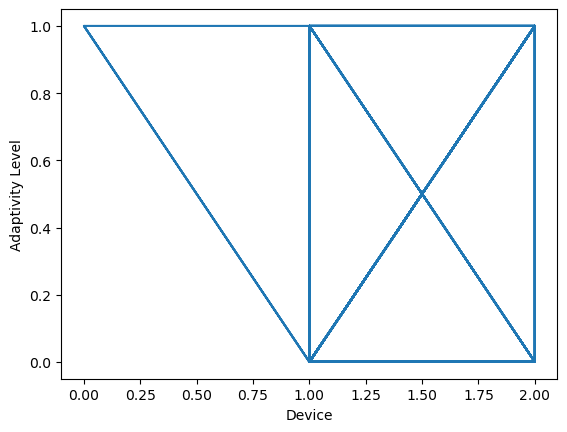

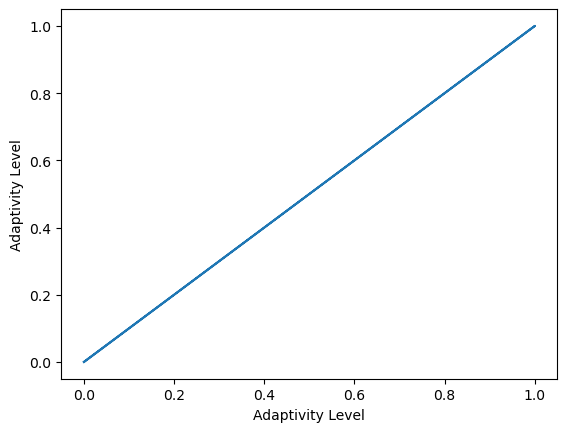

In [139]:
for i in df.columns:
    plt.plot(df[i],df['Adaptivity Level'])
    plt.xlabel(i)
    plt.ylabel('Adaptivity Level')
    plt.show()

### Scaling the DataFrame

In [117]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df.values[:,:-1])
scaled_df = pd.DataFrame(d,columns = df.columns[:-1])
scaled_df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Self Lms,Device
0,1.0,0.6,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.5
1,0.0,0.4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.5
2,0.0,0.4,1.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.5
3,0.0,0.6,0.5,1.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.5
4,1.0,0.6,0.0,1.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
559,0.0,0.6,0.5,1.0,0.0,0.0,1.0,0.5,1.0,1.0,0.0,0.5
560,0.0,0.6,0.5,1.0,1.0,0.0,0.0,0.5,1.0,0.0,0.0,0.5
561,0.0,0.8,0.0,0.0,1.0,1.0,0.0,0.5,0.0,0.0,0.0,1.0
562,1.0,0.6,0.5,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.5


### Building the Model

In [118]:
y = np.array(df['Adaptivity Level'])
x = scaled_df.values

#### Splitting the test and train datasets

In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

#### Creating an fittting the model

In [113]:
log_r = LogisticRegression()
log_r.fit(x_train,y_train)

LogisticRegression()

#### The coefficient and the intercept of the model

In [133]:
print('Coefficients : ',log_r.coef_)
print()
print('Intercepts : ',log_r.intercept_)

Coefficients :  [[-0.79380017  1.05350235  0.58758376 -1.28227513 -0.14355394  0.88146977
  -0.26064652  2.12282246  0.3391141  -0.99940885  1.49057358  0.64579889]]

Intercepts :  [-3.94932747]


#### Model predictions

In [115]:
y_pred = log_r.predict(x_test)

#### Testing the accuracy of the model

In [132]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy : ',accuracy)

Accuracy :  0.8014184397163121


#### Accuracy by cross value score

In [131]:
scores = cross_val_score(log_r,x,y,cv = 5)
print('Accuracy : ',scores.mean())

Accuracy :  0.842146017699115
